In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sb
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy import inf
%matplotlib inline
from jupyterthemes import jtplot 
df = pd.read_csv('cardioActivities.csv')

In [169]:
df.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,11/11/2018 14:05,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40:00,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,11/9/2018 15:02,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,11/4/2018 16:05,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,11/1/2018 14:03,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,10/27/2018 17:01,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

In [171]:
df['Date'] = pd.to_datetime(df['Date'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      508 non-null    datetime64[ns]
 1   Activity Id               508 non-null    object        
 2   Type                      508 non-null    object        
 3   Route Name                1 non-null      object        
 4   Distance (km)             508 non-null    float64       
 5   Duration                  508 non-null    object        
 6   Average Pace              508 non-null    object        
 7   Average Speed (km/h)      508 non-null    float64       
 8   Calories Burned           508 non-null    float64       
 9   Climb (m)                 508 non-null    int64         
 10  Average Heart Rate (bpm)  294 non-null    float64       
 11  Friend's Tagged           0 non-null      float64       
 12  Notes                 

In [173]:
df['month'] = df['Date'].dt.month

In [174]:
df['year'] = df['Date'].dt.year

In [175]:
df.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File,month,year
0,2018-11-11 14:05:00,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40:00,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx,11,2018
1,2018-11-09 15:02:00,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx,11,2018
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx,11,2018
3,2018-11-01 14:03:00,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx,11,2018
4,2018-10-27 17:01:00,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx,10,2018


In [176]:
df_1=df[['year','Distance (km)']].groupby(['year']).mean().reset_index()
df_2=df[['month','Distance (km)']].groupby(['month']).mean().reset_index()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7 non-null      int64  
 1   Distance (km)  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


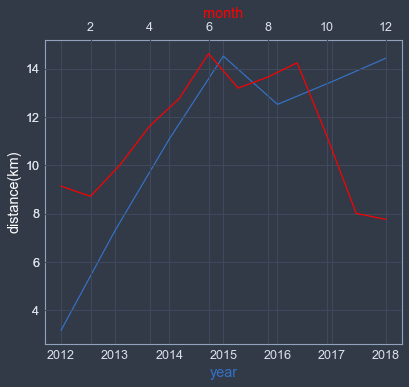

In [177]:
jtplot.style()
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)


ax1.plot(df_1['year'],df_1['Distance (km)'])
ax1.set_xlabel("year", color="C0")
ax1.set_ylabel("distance(km)", color="white")

ax2.plot(df_2['month'],df_2['Distance (km)'],color='red')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.set_xlabel("month", color="red")

ax1.get_shared_y_axes().join(ax1, ax2)
plt.show()

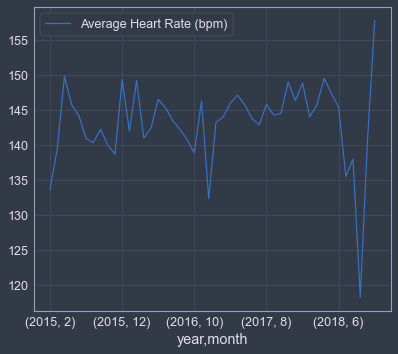

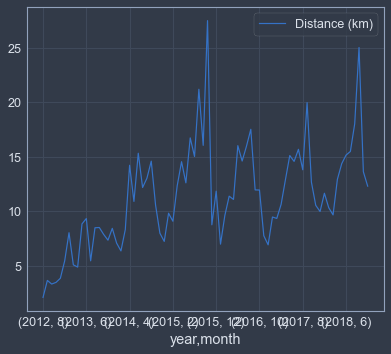

In [178]:
df_1=df[['month','year','Average Heart Rate (bpm)']].groupby(['year','month']).mean().plot()
df_2=df[['month','year','Distance (km)']].groupby(['year','month']).mean().plot()

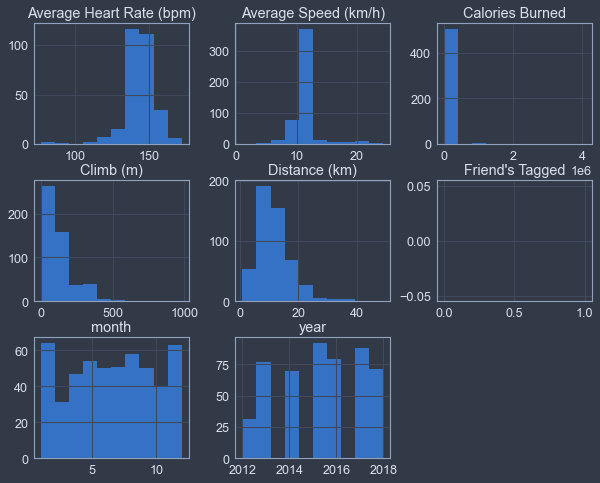

In [179]:
df.hist(figsize=(10,8));

Text(0, 0.5, 'Observed Values')

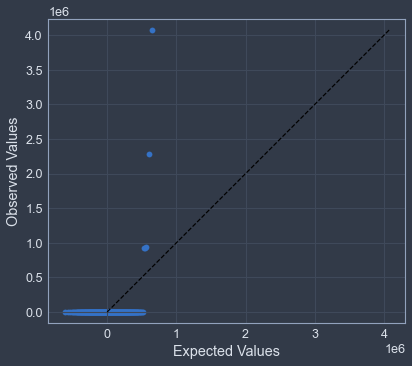

In [180]:
samp_mean = df['Calories Burned'].mean()
samp_sd = df['Calories Burned'].std()
n_points = df.shape[0]
qs = (np.arange(n_points) - .05) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, df['Calories Burned'].sort_values())
x=df['Calories Burned'].min()
y=df['Calories Burned'].max()
plt.plot([x,y],[x,y],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

In [181]:
# function for cleaning data from  outliers: 
def outlier(s):
    """
    Detect outliers in a pandas data series.
    
    Parameters
        ----------
        s : pandas series.
        
    Returns
        ----------
        Series or float64
            Outliers outside inner fence in input series (Q1-1.5*IQR and Q3+1.5*IQR).
            
    """
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    return s[(s < lower) | (s > upper)]


In [182]:
outlier(df['Calories Burned'])

16     1.652000e+03
90     1.682000e+03
93     1.669000e+03
96     1.667000e+03
109    1.668000e+03
124    1.569000e+03
246    2.588000e+03
252    1.658000e+03
256    1.972000e+03
259    1.794000e+03
269    1.688000e+03
346    1.633000e+03
503    9.267430e+05
504    9.421920e+05
505    9.244860e+05
506    2.288868e+06
507    4.072685e+06
Name: Calories Burned, dtype: float64

In [183]:
df = df.drop(index=outlier(df['Calories Burned']).index, axis = 0)

In [184]:
df.loc[outlier(df['Calories Burned']).index]

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File,month,year
250,2015-09-18 18:39:00,3273b8d6-96a2-4162-99d4-5277ebe826ce,Running,NaN,22.15,2:01:30,5:29,10.94,1543.999999,182,149.0,NaN,TomTom MySports Watch,2015-09-18-183938.gpx,9,2015
266,2015-07-26 08:02:00,6e225b5e-08d0-46d0-bbb2-6f6fd3dec433,Running,NaN,22.09,2:16:22,6:10,9.72,1557.000000,372,142.0,NaN,NaN,2015-07-26-080236.gpx,7,2015
378,2014-04-27 10:00:00,a0c970d4-cfa5-4db9-8532-8e6d5b43d06f,Running,NaN,21.73,1:46:38,4:54,12.23,1543.000000,22,NaN,NaN,NaN,2014-04-27-100000.gpx,4,2014


In [185]:
df = df.drop(index=outlier(df['Calories Burned']).index, axis = 0)
df.loc[outlier(df['Calories Burned']).index]

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File,month,year


In [186]:
df.columns

Index(['Date', 'Activity Id', 'Type', 'Route Name', 'Distance (km)',
       'Duration', 'Average Pace', 'Average Speed (km/h)', 'Calories Burned',
       'Climb (m)', 'Average Heart Rate (bpm)', 'Friend's Tagged', 'Notes',
       'GPX File', 'month', 'year'],
      dtype='object')

In [187]:
col_list = ['Distance (km)','Average Speed (km/h)', 
       'Climb (m)', 'Average Heart Rate (bpm)']
         
for x in col_list:
    y=outlier(df[x])
    df = df.drop(index=y.index, axis = 0)
   


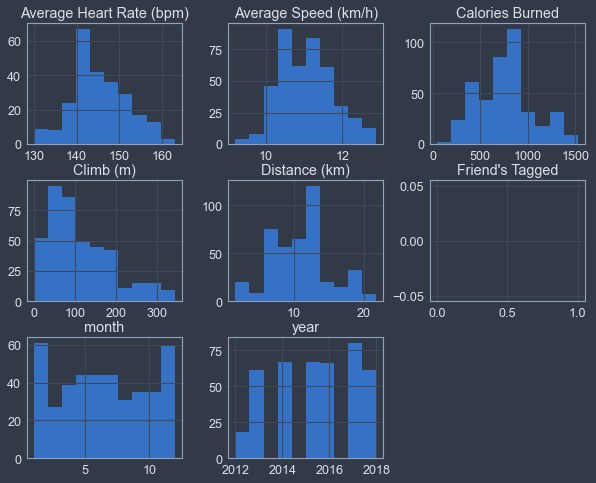

In [188]:
df.hist(figsize=(10,8));

In [189]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 498
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      420 non-null    datetime64[ns]
 1   Activity Id               420 non-null    object        
 2   Type                      420 non-null    object        
 3   Route Name                1 non-null      object        
 4   Distance (km)             420 non-null    float64       
 5   Duration                  420 non-null    object        
 6   Average Pace              420 non-null    object        
 7   Average Speed (km/h)      420 non-null    float64       
 8   Calories Burned           420 non-null    float64       
 9   Climb (m)                 420 non-null    int64         
 10  Average Heart Rate (bpm)  248 non-null    float64       
 11  Friend's Tagged           0 non-null      float64       
 12  Notes                 

In [190]:
df1 = df[['Distance (km)', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)']]

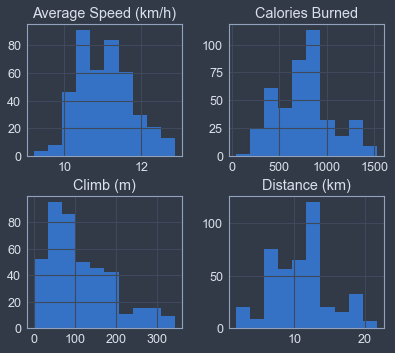

In [191]:
df1.hist();

In [192]:
df1

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m)
0,10.44,10.68,774.0,130
1,12.84,10.39,954.0,168
2,13.01,10.37,967.0,171
3,12.98,10.47,960.0,169
4,13.02,10.73,967.0,170
...,...,...,...,...
492,3.16,11.52,225.0,18
493,3.11,10.98,223.0,18
494,3.27,12.32,231.0,15
495,6.26,11.53,455.0,34


In [193]:
z_scores = stats.zscore(df1)
z_scores

array([[-0.1331714 , -0.54875589,  0.00746166,  0.20327058],
       [ 0.44660993, -0.966418  ,  0.62417014,  0.69318277],
       [ 0.48767777, -0.99522228,  0.66871019,  0.73186005],
       ...,
       [-1.86526812,  1.81319535, -1.85294226, -1.2793584 ],
       [-1.14295722,  0.67542616, -1.08548282, -1.03440231],
       [-1.89667294,  0.71863258, -1.85636842, -1.24068112]])

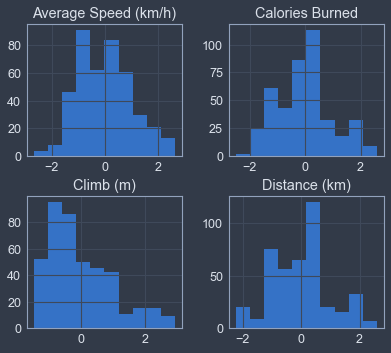

In [194]:
df1_1 = pd.DataFrame(data = z_scores, columns = df1.columns)
df1_1.hist();

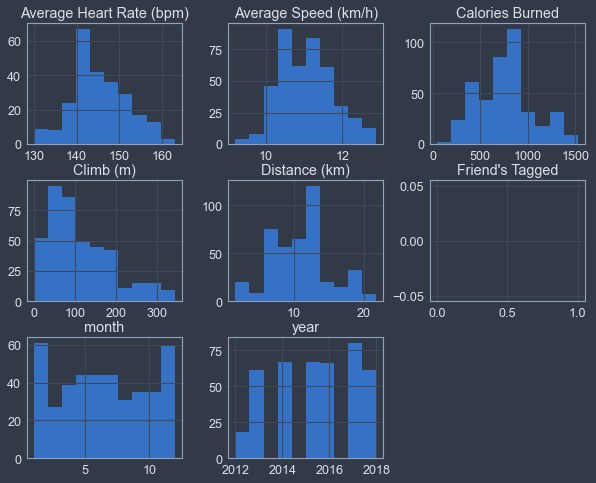

In [195]:
df.hist(figsize=(10,8));

In [196]:
threshold = 3
mask = (df1_1 < -3) | (df1_1 > 3)
np.where(mask)
mask

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
415,False,False,False,False
416,False,False,False,False
417,False,False,False,False
418,False,False,False,False


In [197]:
mask.any().sum()

0

Text(0, 0.5, 'Observed Values')

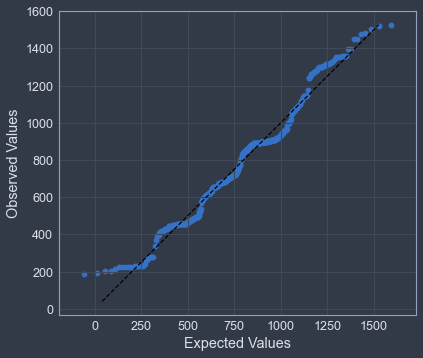

In [198]:
samp_mean = df['Calories Burned'].mean()
samp_sd = df['Calories Burned'].std()
n_points = df.shape[0]
qs = (np.arange(n_points) - .05) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, df['Calories Burned'].sort_values())
x=df['Calories Burned'].min()
y=df['Calories Burned'].max()
plt.plot([x,y],[x,y],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

In [199]:
df.loc[outlier(df['Average Heart Rate (bpm)']).index]

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File,month,year
166,2016-11-24 18:50:00,1bfdff30-6f7f-4428-9316-3b6289bd57f3,Running,NaN,6.73,36:01:00,5:21,11.21,471.0,65,163.0,NaN,TomTom MySports Watch,2016-11-24-185024.gpx,11,2016


In [200]:
col_list=['Distance (km)', 'Average Speed (km/h)', 'Calories Burned', 'Average Heart Rate (bpm)']
for x in col_list:
    y=outlier(df[x])
    df = df.drop(index=y.index, axis = 0)

In [201]:
df2 = df[['Distance (km)', 'Average Speed (km/h)', 'Calories Burned', 'Average Heart Rate (bpm)']]

In [202]:
df_1=df[['Calories Burned','Distance (km)']].groupby(['Calories Burned']).mean().reset_index()
df_2=df[['Average Heart Rate (bpm)','Distance (km)']].groupby(['Average Heart Rate (bpm)']).mean().reset_index()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calories Burned  317 non-null    float64
 1   Distance (km)    317 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


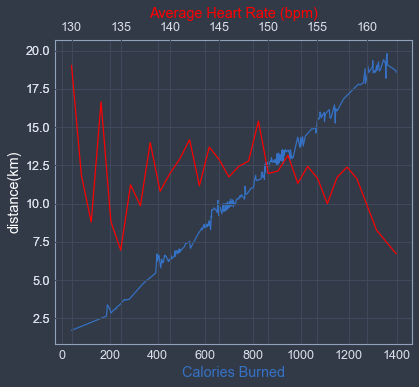

In [203]:
jtplot.style()
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
, 

ax1.plot(df_1['Calories Burned'],df_1['Distance (km)'])
ax1.set_xlabel('Calories Burned', color="C0")
ax1.set_ylabel("distance(km)", color="white")

ax2.plot(df_2['Average Heart Rate (bpm)'],df_2['Distance (km)'],color='red')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.set_xlabel('Average Heart Rate (bpm)', color="red")
ax1.set_ylabel("distance(km)", color="white")

ax1.get_shared_y_axes().join(ax1, ax2)
plt.show()

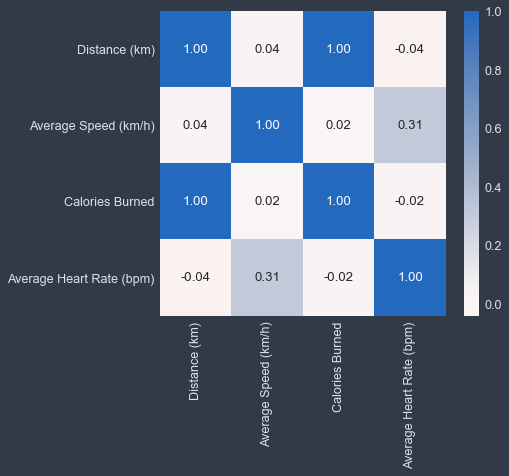

In [204]:
sb.heatmap(df2.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);